读取一幅彩色图像，并在屏幕上显示。同时显示出三基色分量图像。 

In [1]:
#!/usr/bin/python3 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
root_path = '/root/DIVP_project/'
image_path_vivid = "project01/proj01-images/lena_std.bmp"
image_path_gray = "project01/proj01-images/Fig2.22(b).jpg"
image_path_tif = "project01/proj01-images/Fig0308(a)(fractured_spine).tif"

In [3]:
img_pil_vivid = Image.open(root_path+image_path_vivid)
# img_pil_vivid.show()
print(type(img_pil_vivid))
print(img_pil_vivid.size)
print(img_pil_vivid.mode)

<class 'PIL.BmpImagePlugin.BmpImageFile'>
(512, 512)
RGB


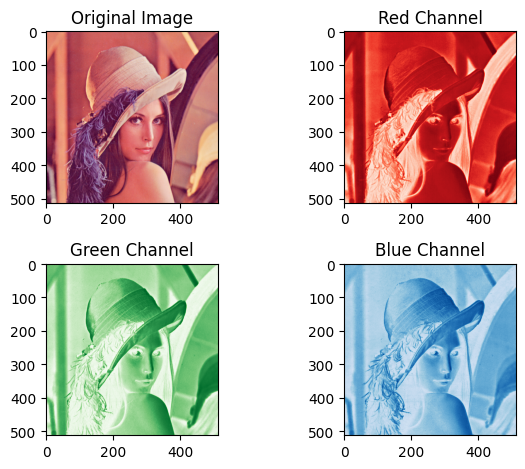

In [4]:
r,g,b = img_pil_vivid.split()
# 使用matplotlib显示图片
plt.figure()
plt.subplot(221)
plt.imshow(img_pil_vivid)
plt.title('Original Image')
plt.subplot(222)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.subplot(223)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.subplot(224)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.tight_layout()
plt.show()

In [5]:
#定义一个函数，将img_pil_vivid 图像从RGB颜色空间转换到HSV颜色空间
def rgb2hsv(img_pil):
    img_array = np.array(img_pil)
    img_array = img_array / 255.0
    r, g, b = img_array[:, :, 0], img_array[:, :, 1], img_array[:, :, 2]
    max_val = np.max(img_array, axis=2)
    min_val = np.min(img_array, axis=2)
    h = np.zeros_like(max_val)
    s = np.zeros_like(max_val)
    v = max_val
    delta = max_val - min_val
    s[max_val != 0] = delta[max_val != 0] / max_val[max_val != 0]
    h[max_val == r] = (g[max_val == r] - b[max_val == r]) / delta[max_val == r]
    h[max_val == g] = 2 + (b[max_val == g] - r[max_val == g]) / delta[max_val == g]
    h[max_val == b] = 4 + (r[max_val == b] - g[max_val == b]) / delta[max_val == b]
    h = h / 6.0 % 1.0
    return h, s, v

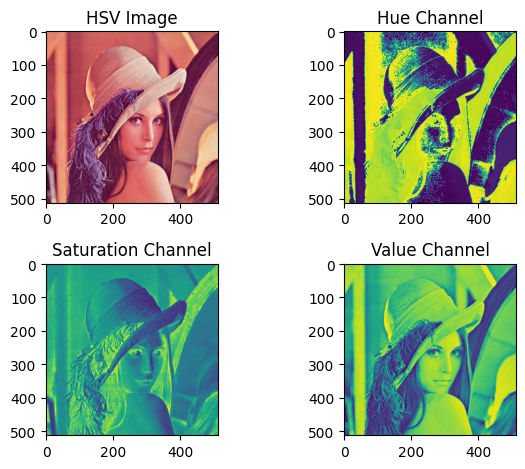

In [6]:
# 将imge_pil_vivid 转换到HSV空间
# img_hsv_vivid = img_pil_vivid.convert('HSV')
# h,s,v = img_hsv_vivid.split()
h,s,v = rgb2hsv(img_pil_vivid)
plt.figure()
plt.subplot(221)
plt.imshow(img_pil_vivid)
plt.title('HSV Image')
plt.subplot(222)
plt.imshow(h)
plt.title('Hue Channel')
plt.subplot(223)
plt.imshow(s)
plt.title('Saturation Channel')
plt.subplot(224)
plt.imshow(v)
plt.title('Value Channel')
plt.tight_layout()
plt.show()